In [1]:
import tensorflow as tf
from utils.data_preprocess import load_data
from utils.module import model_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np  
from utils.model_evaluation import plot_test_pred
import pandas as pd

2023-09-06 16:04:36.636643: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 16:04:37.283136: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.1
# GPUs Available:  1


2023-09-06 16:04:38.471636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-06 16:04:38.491882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-06 16:04:38.492094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [2]:
def load_data(data_no):
    file_name = ['X_train', 'X_test', 'y_train', 'y_test', 'X_val', 'y_val']
    data = []
    for f in file_name:
        df = pd.read_csv('./'+data_no+'/'+f+'.csv',)
        df = df.reset_index(drop=True)
        data.append(df)

    X_train = data[0] 
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]
    X_val = data[4]
    y_val = data[5]

    X_train = X_train[['MFC6', 'MFC7', 'MFC8', 'MFC9', 'MFC10', 'MFC1', 'MFC2', 'MFC3', 'MFC4', 'MFC5']]
    X_test = X_test[['MFC6', 'MFC7', 'MFC8', 'MFC9', 'MFC10', 'MFC1', 'MFC2', 'MFC3', 'MFC4', 'MFC5']]
    X_val = X_val[['MFC6', 'MFC7', 'MFC8', 'MFC9', 'MFC10', 'MFC1', 'MFC2', 'MFC3', 'MFC4', 'MFC5']]

    y_train = y_train[['x1', 'y1']]
    y_test = y_test[['x1', 'y1']]
    y_val = y_val[['x1', 'y1']]

    scaler_coords = StandardScaler()
    y_train = scaler_coords.fit_transform(y_train)
    y_test = scaler_coords.transform(y_test)
    y_val = scaler_coords.transform(y_val)

    scaler_flows = StandardScaler()
    X_train = scaler_flows.fit_transform(X_train)
    X_test = scaler_flows.transform(X_test)
    X_val = scaler_flows.transform(X_val)
    return X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords

2023-09-06 16:04:38.531182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-06 16:04:38.531527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-06 16:04:38.531742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

2/2 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.1527
scaled


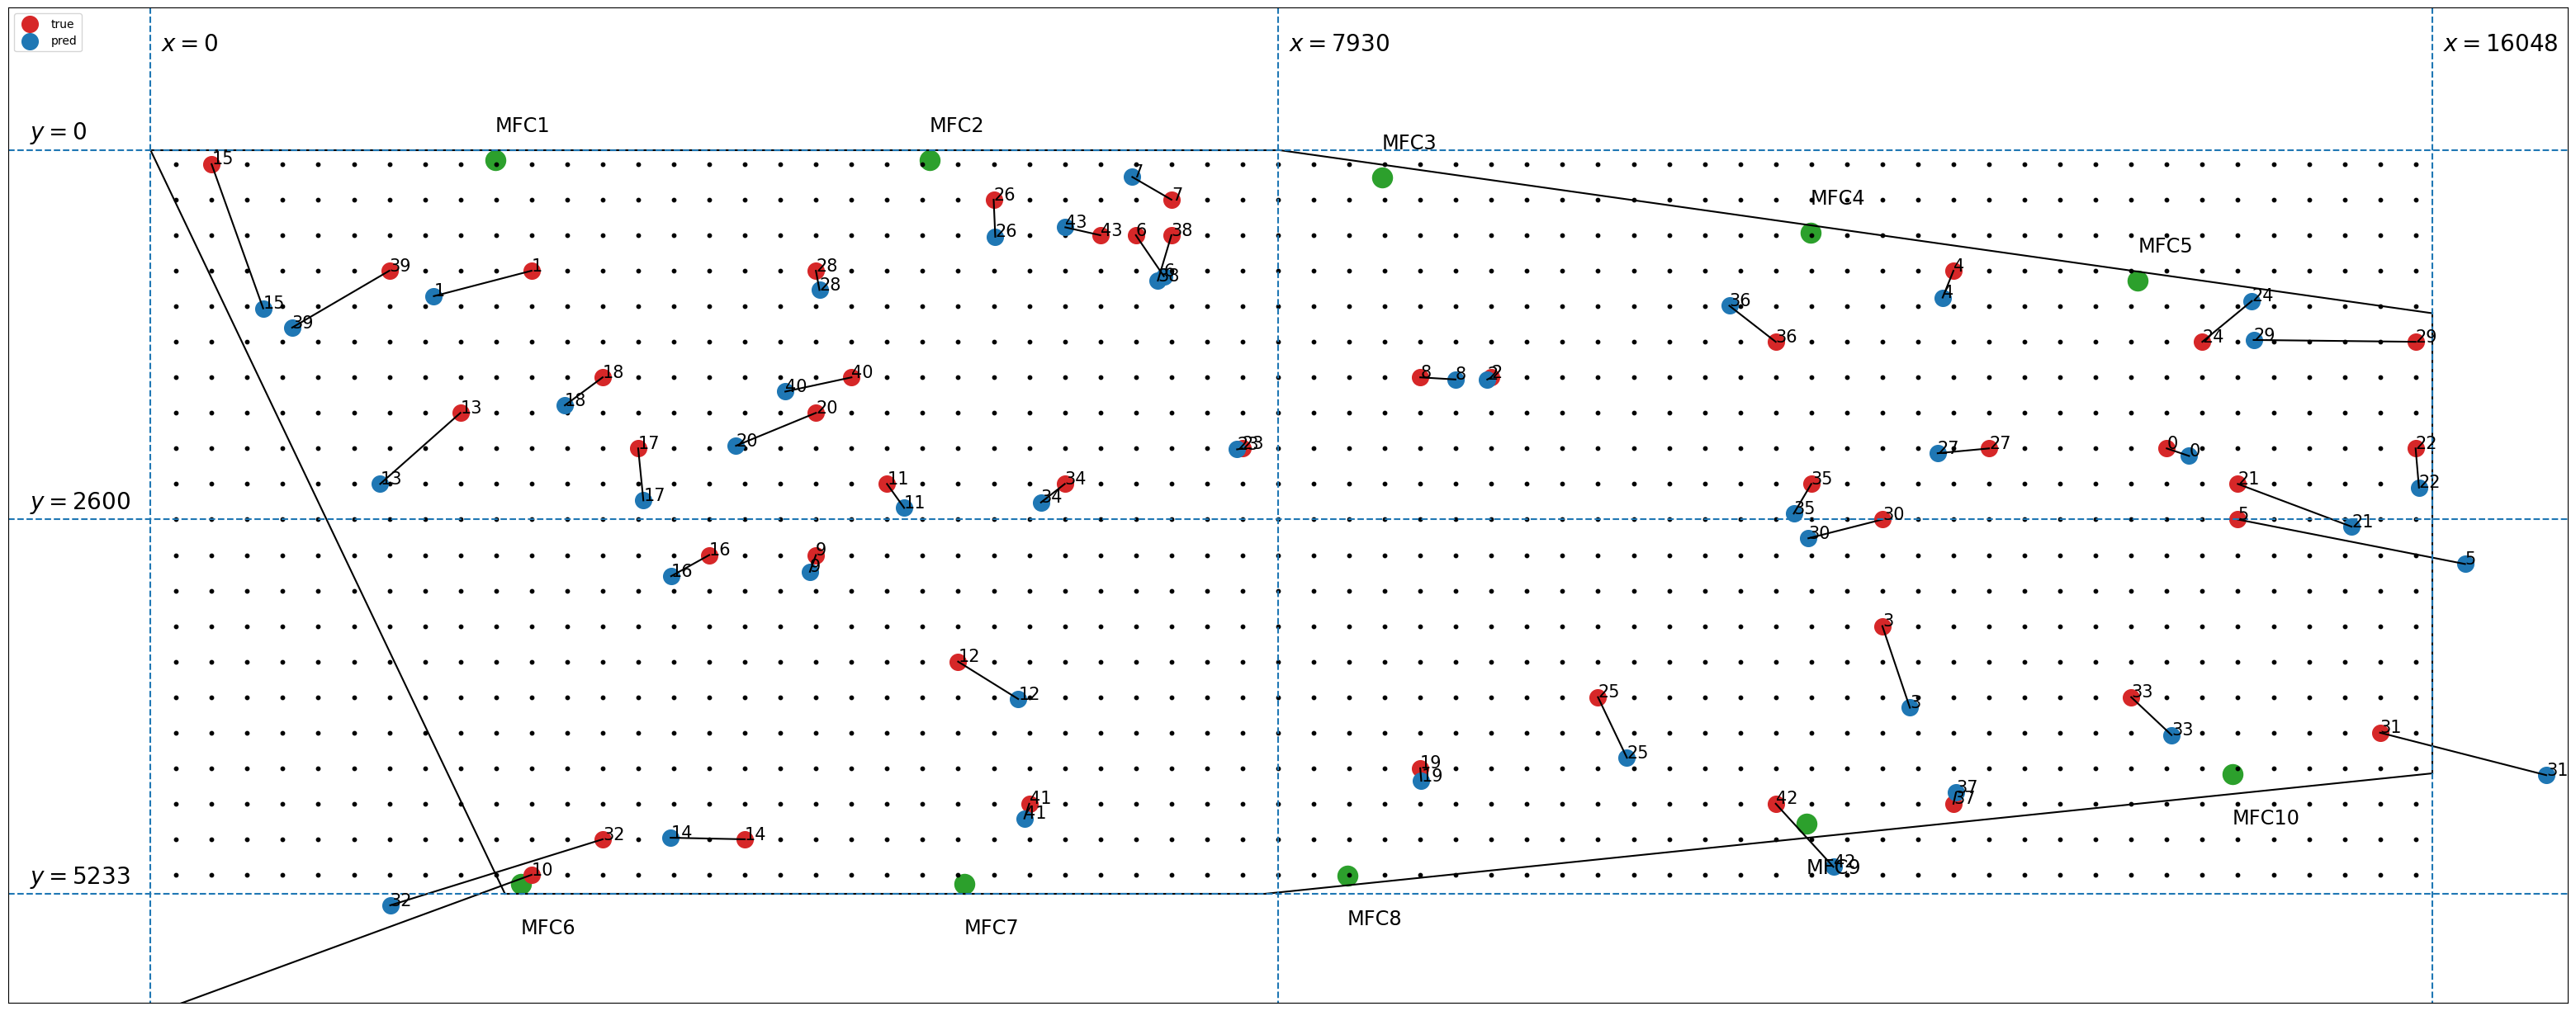

In [3]:
#less data collected after first visit
model1 = tf.keras.models.load_model('saved_model/single_leak/single_leakage_model')
X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords = load_data('model_data_1st visit')
model_evaluate, y_pred = model_eval(model1, X_test, y_test, X_train, y_train, X_val, y_val)
plot_test_pred(y_test, y_pred, scaler_coords)

3/3 [==============================] - 0s 3ms/step - loss: 0.0149 - mae: 0.0879
scaled


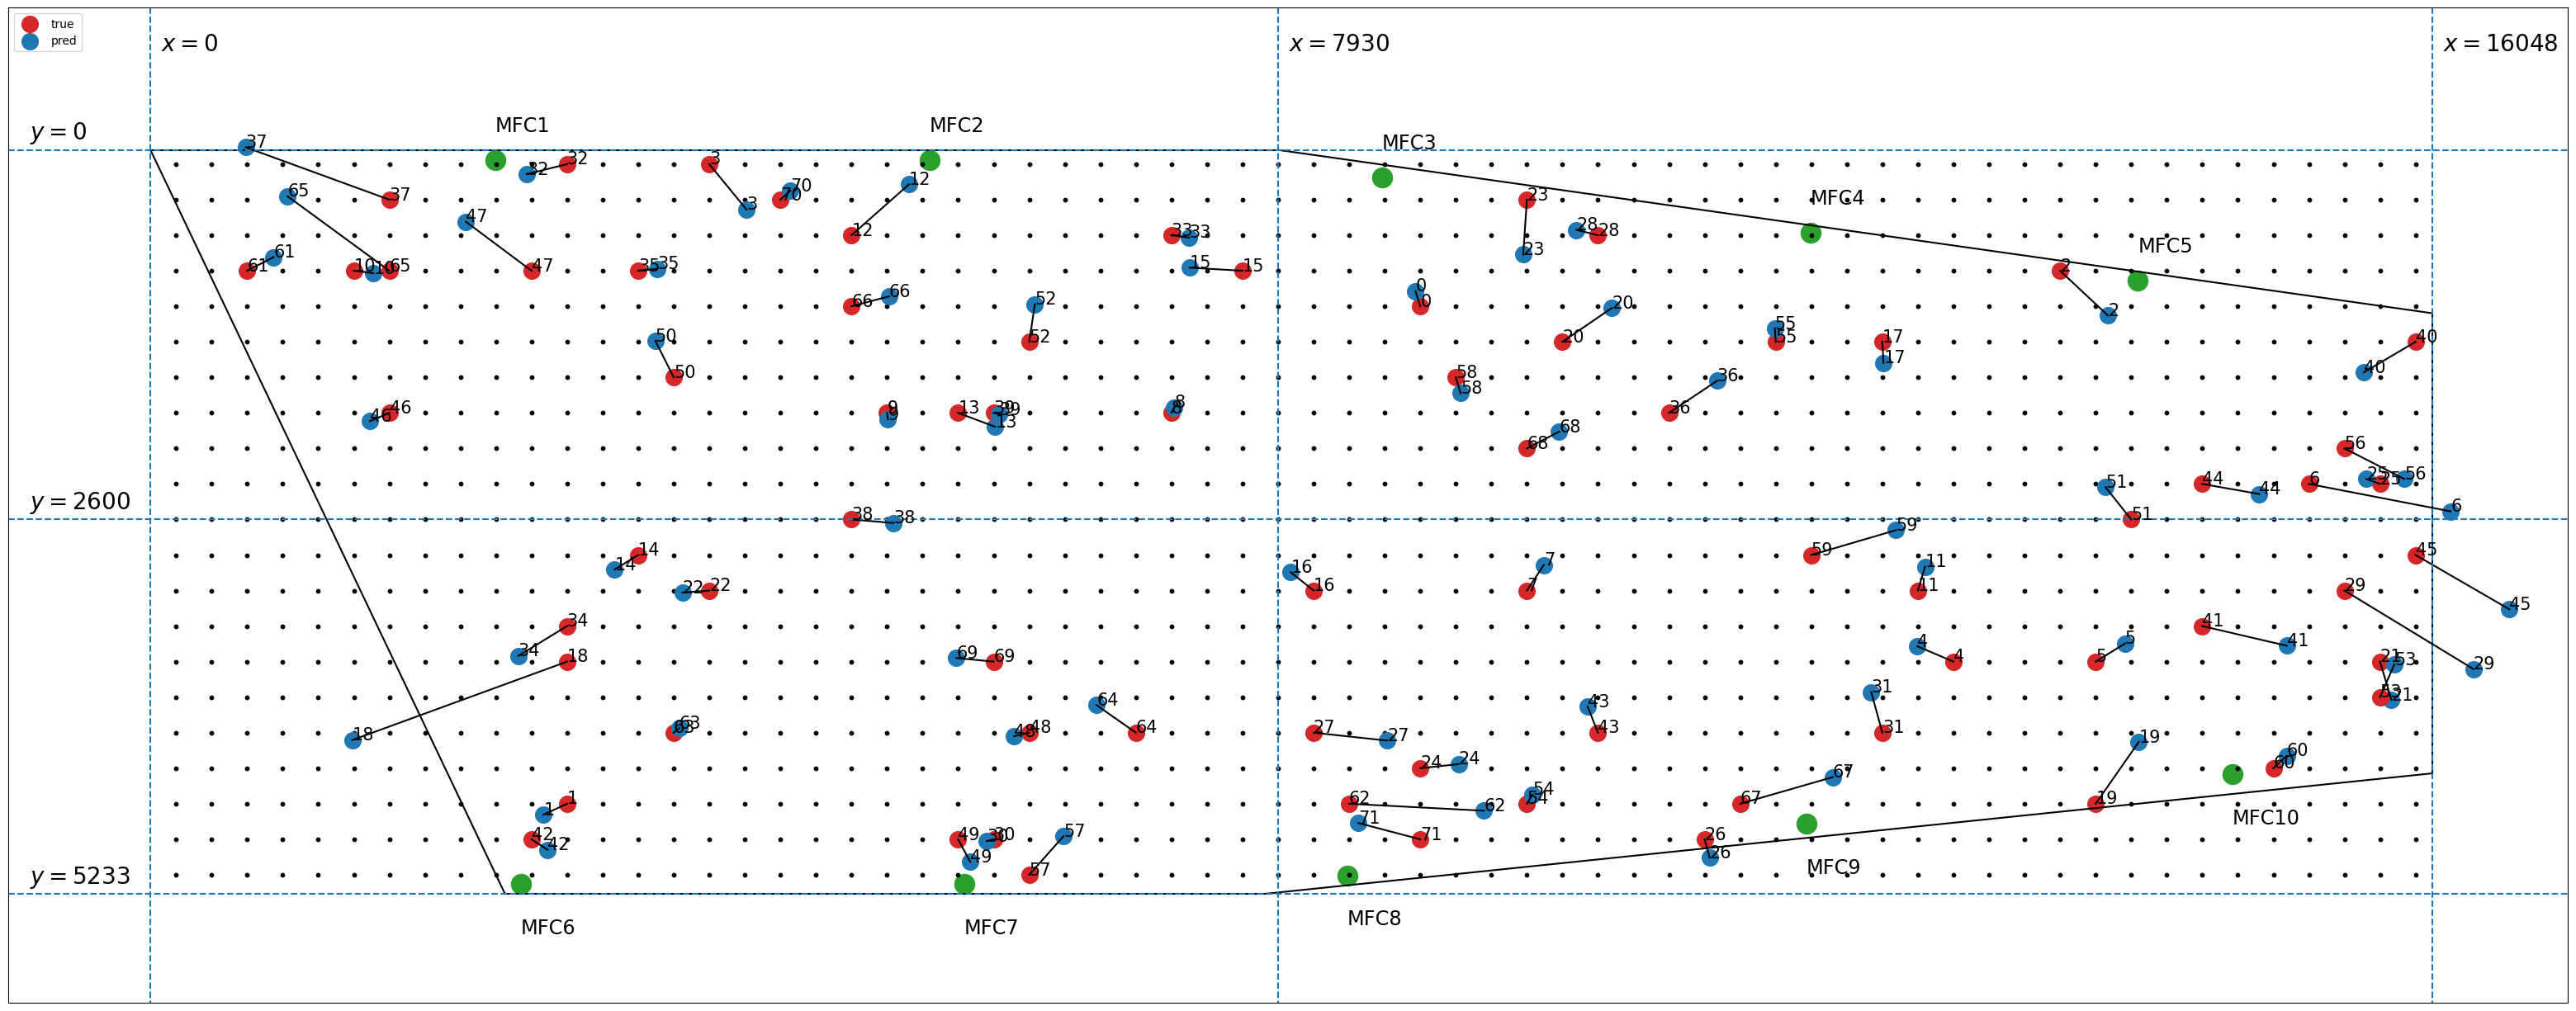

In [4]:
#full data. but not filtered out for bad quality data
model2 = tf.keras.models.load_model('saved_model/single_leak/single_leakage_model_func')
X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords = load_data('model_data')
model_evaluate, y_pred = model_eval(model2, X_test, y_test, X_train, y_train, X_val, y_val)
plot_test_pred(y_test, y_pred, scaler_coords)

2/2 [==============================] - 0s 6ms/step - loss: 0.0151 - mae: 0.0780
scaled


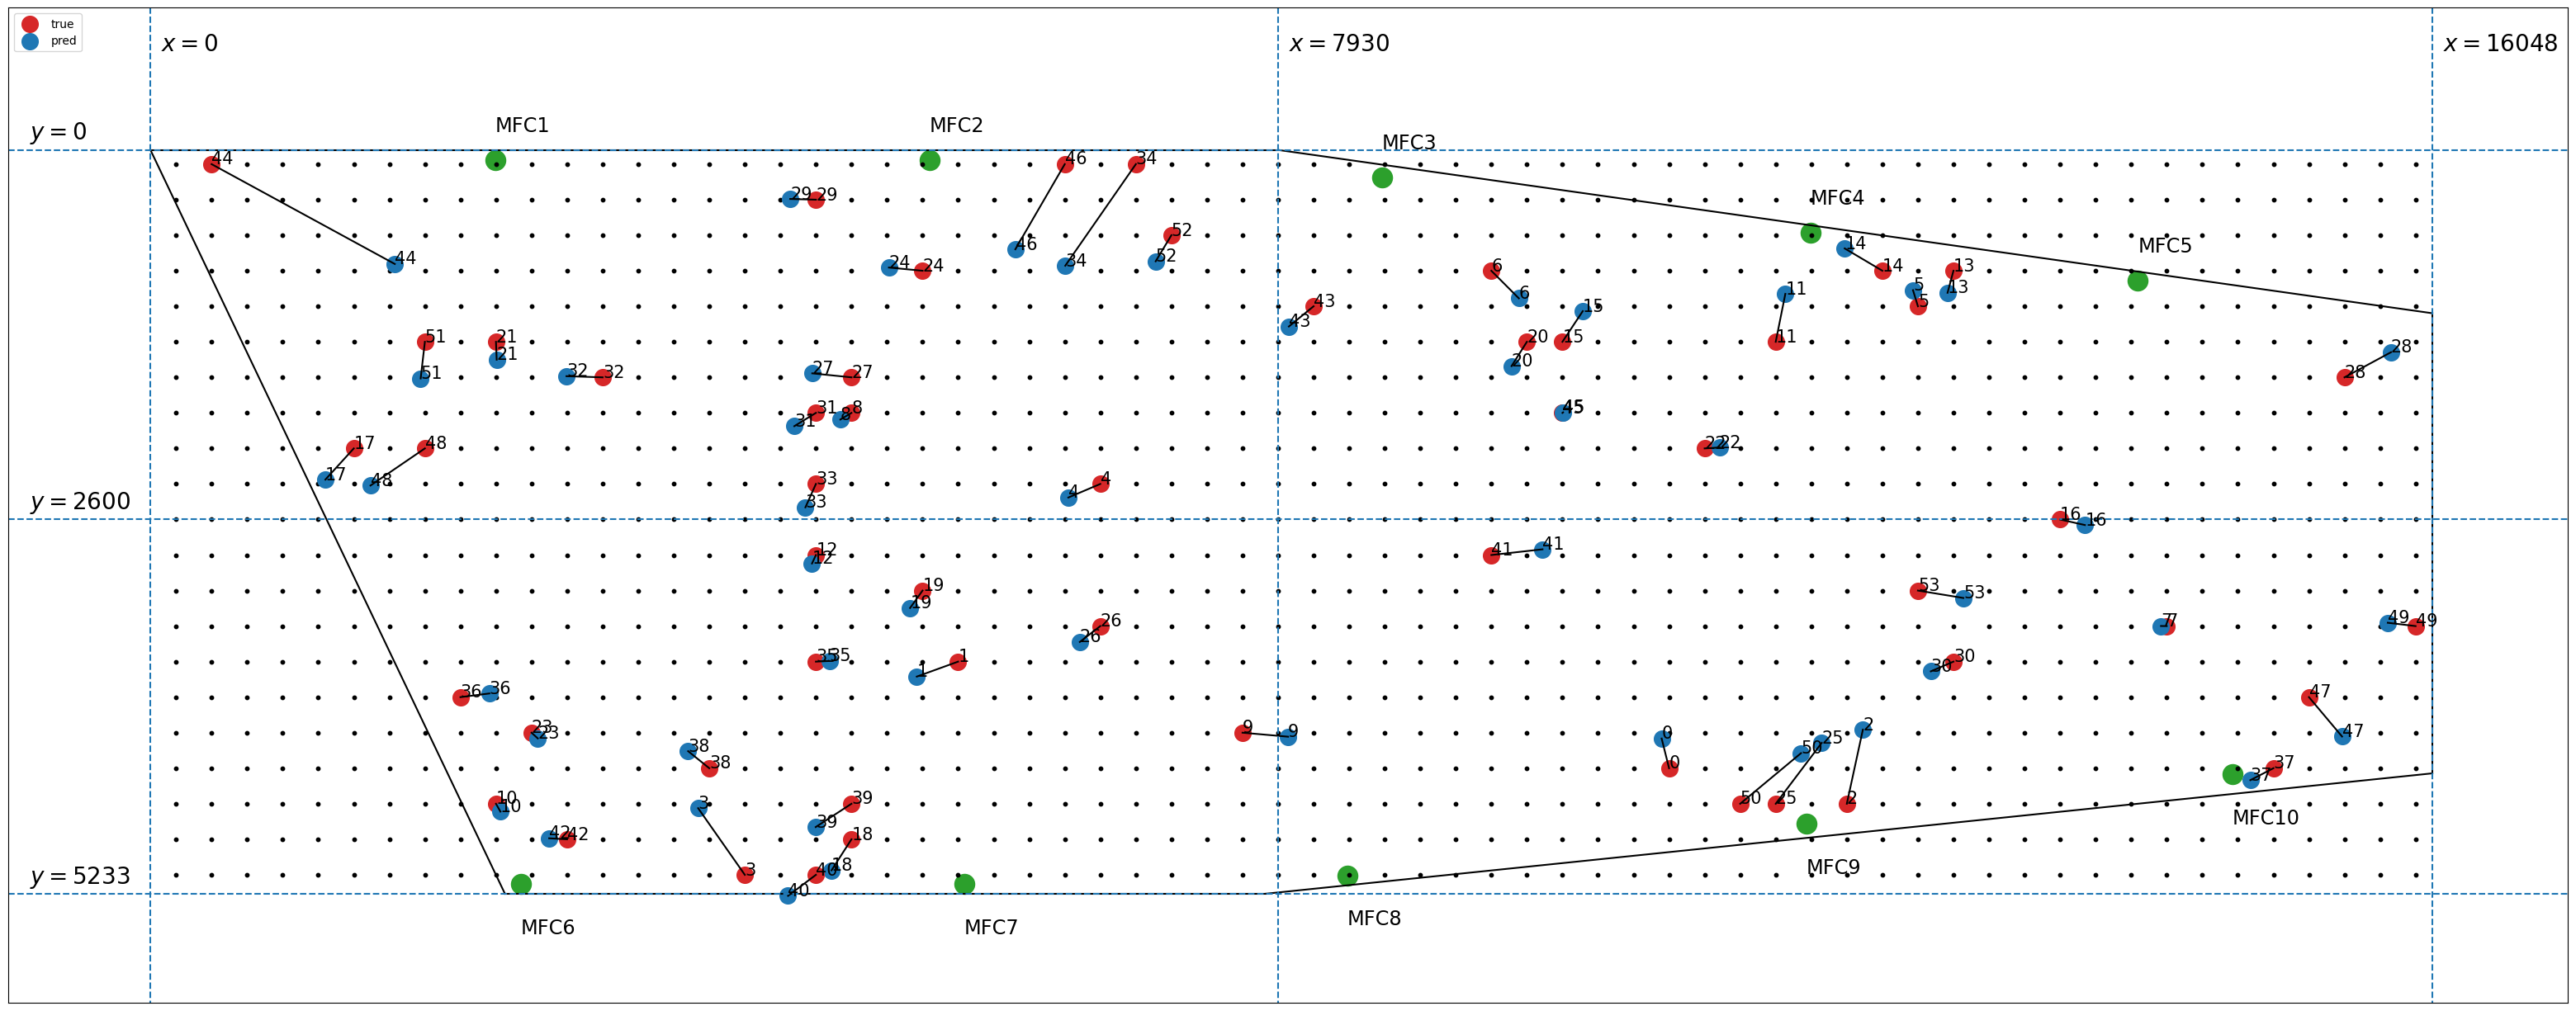

In [5]:
#full data. but filtered out for bad quality data
model3 = tf.keras.models.load_model('saved_model/single_leak/single_leakage_model_less')
X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords = load_data('model_data_new_less')
model_evaluate, y_pred = model_eval(model3, X_test, y_test, X_train, y_train, X_val, y_val)
plot_test_pred(y_test, y_pred, scaler_coords)

3/3 [==============================] - 0s 3ms/step - loss: 0.0166 - mae: 0.0919
scaled


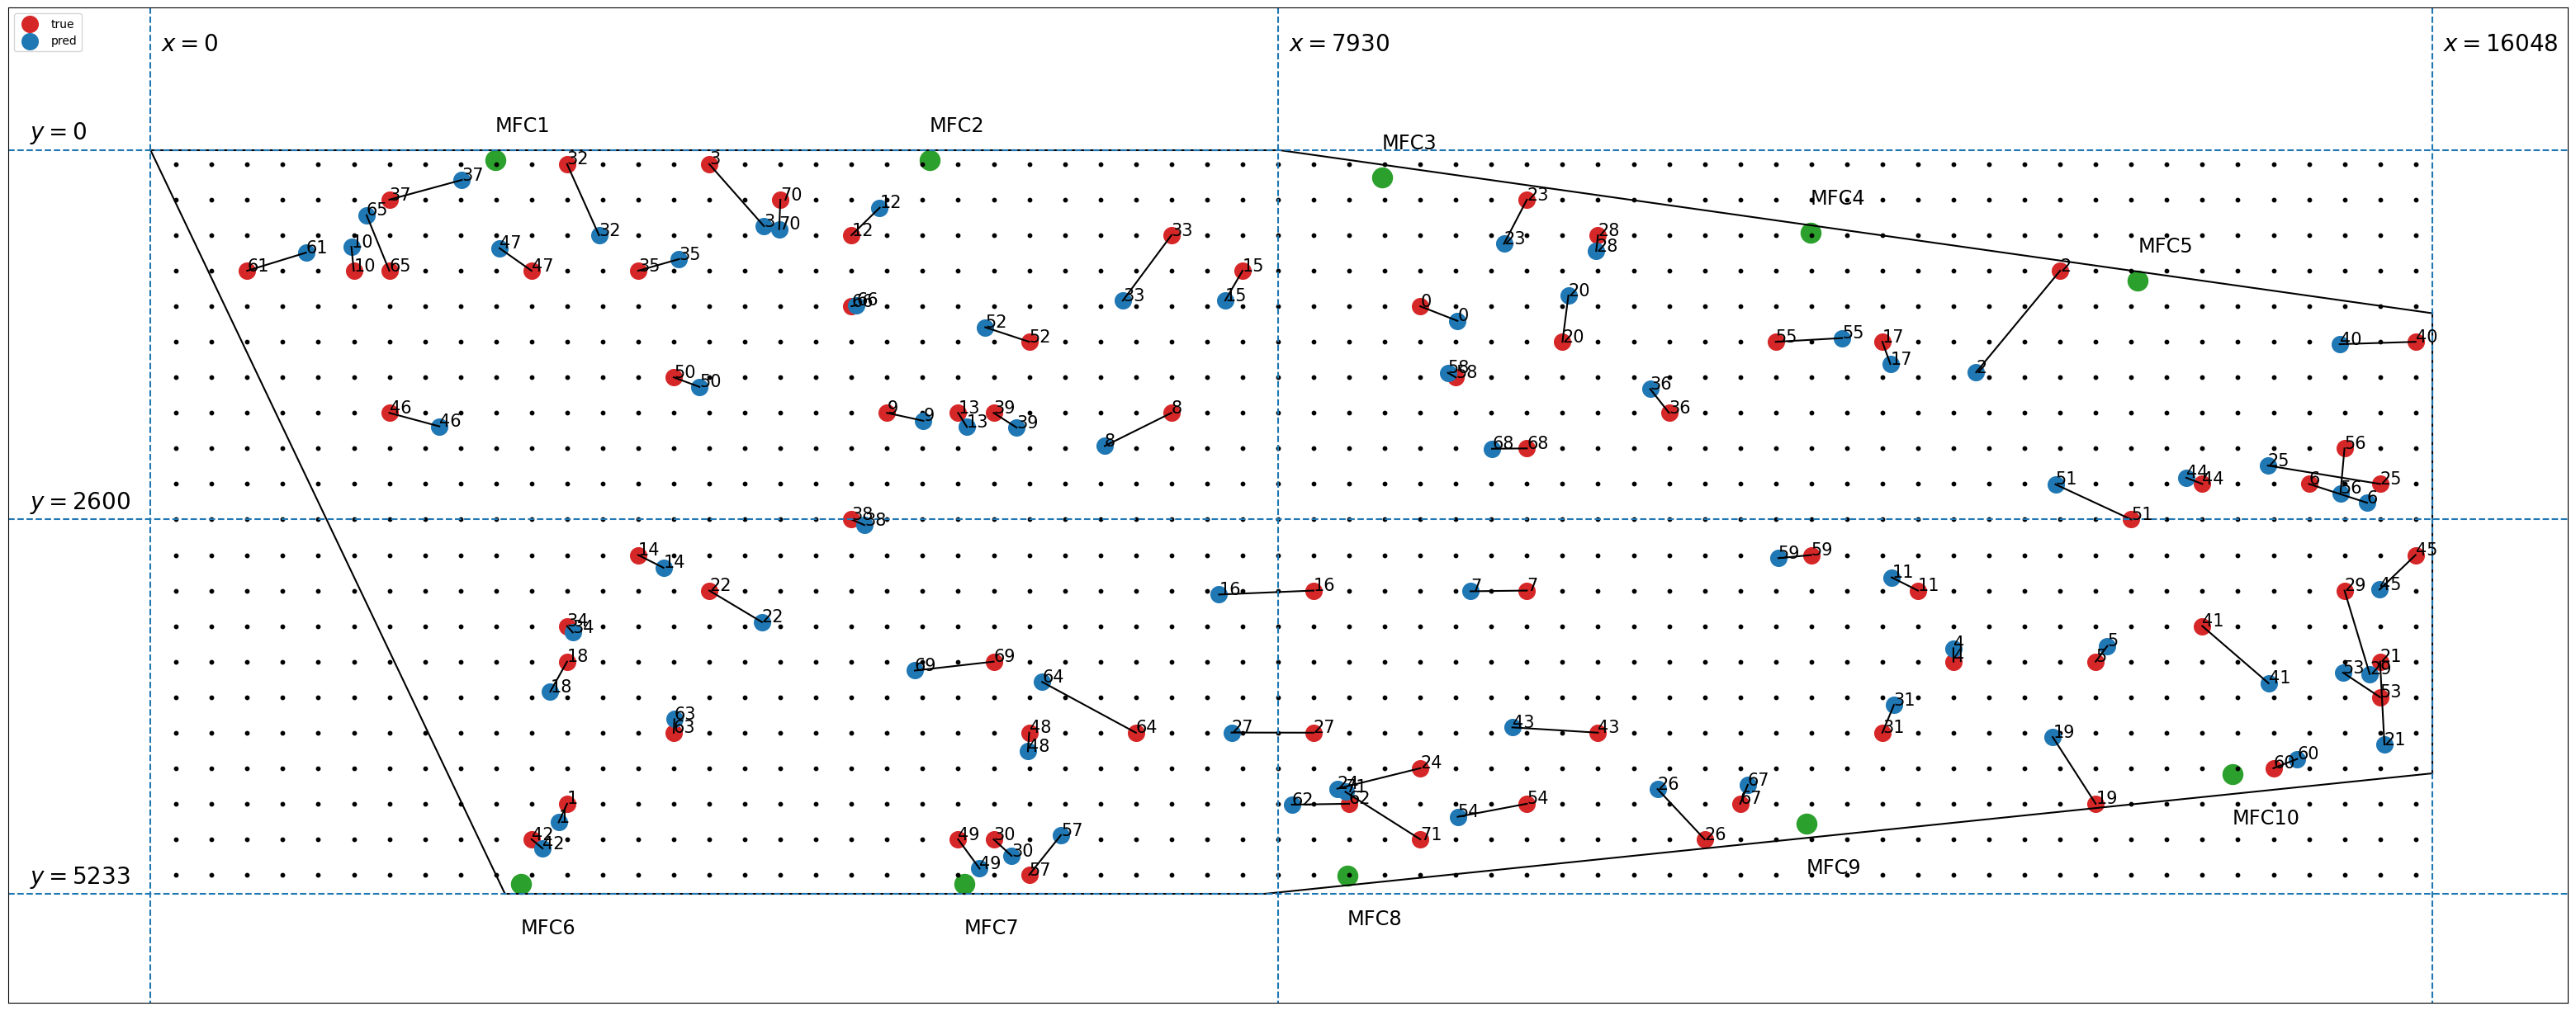

In [6]:
#full data. No idea what special about this model
model4 = tf.keras.models.load_model('saved_model/single_leak/single_leakage_model_new')
X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords = load_data('model_data')
model_evaluate, y_pred = model_eval(model4, X_test, y_test, X_train, y_train, X_val, y_val)
plot_test_pred(y_test, y_pred, scaler_coords)

3/3 [==============================] - 0s 4ms/step - loss: 0.0233 - mae: 0.1153
scaled


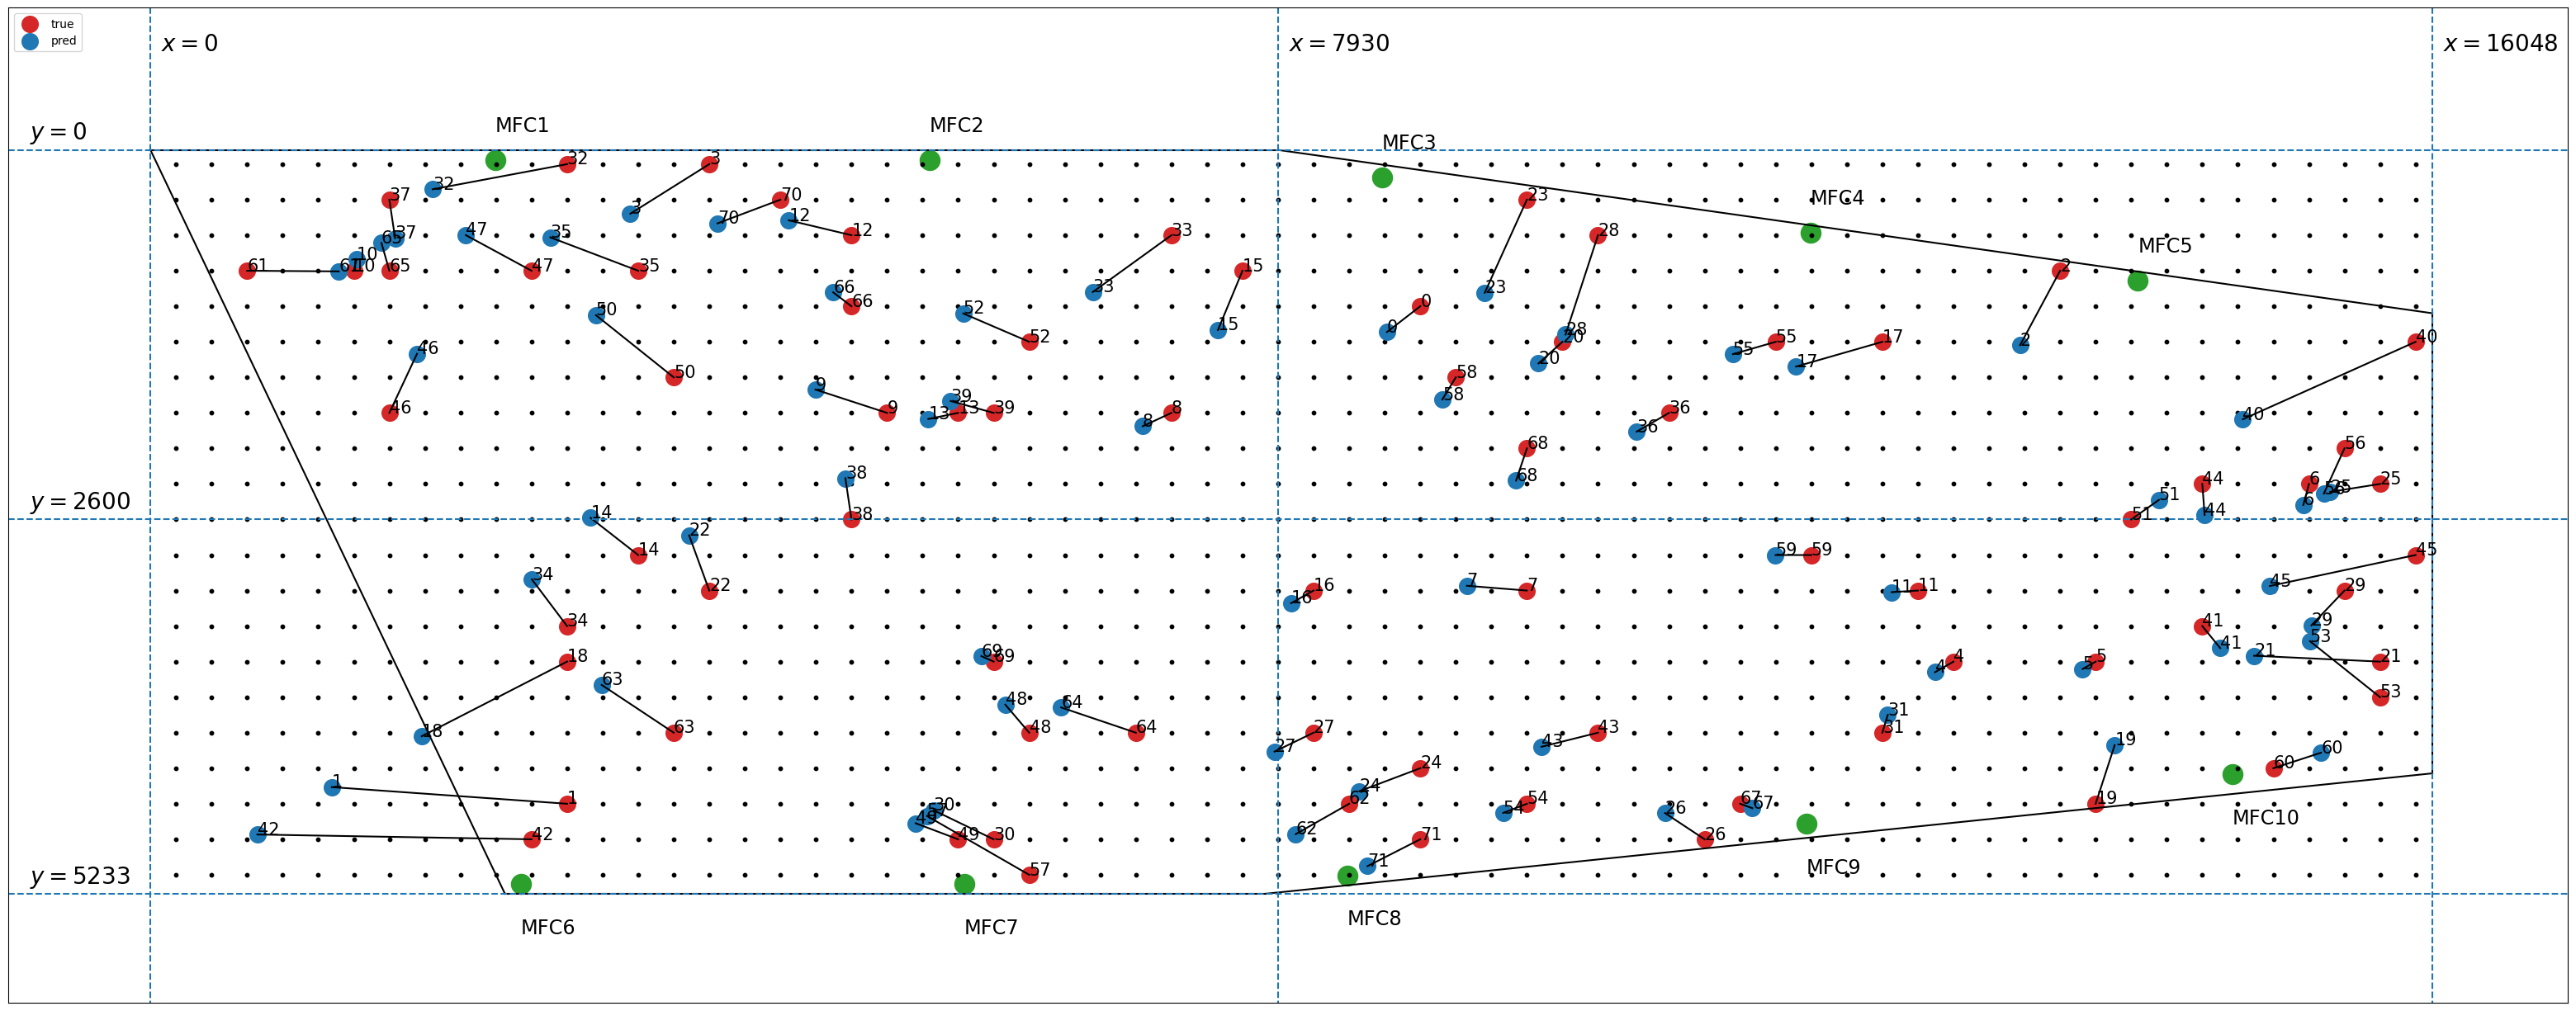

In [7]:
#full data. No idea what special about this model
model5 = tf.keras.models.load_model('saved_model/single_leak/with_dropout')
X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords = load_data('model_data')
model_evaluate, y_pred = model_eval(model5, X_test, y_test, X_train, y_train, X_val, y_val)
plot_test_pred(y_test, y_pred, scaler_coords)

3/3 [==============================] - 0s 3ms/step - loss: 0.0336 - mae: 0.1107
scaled


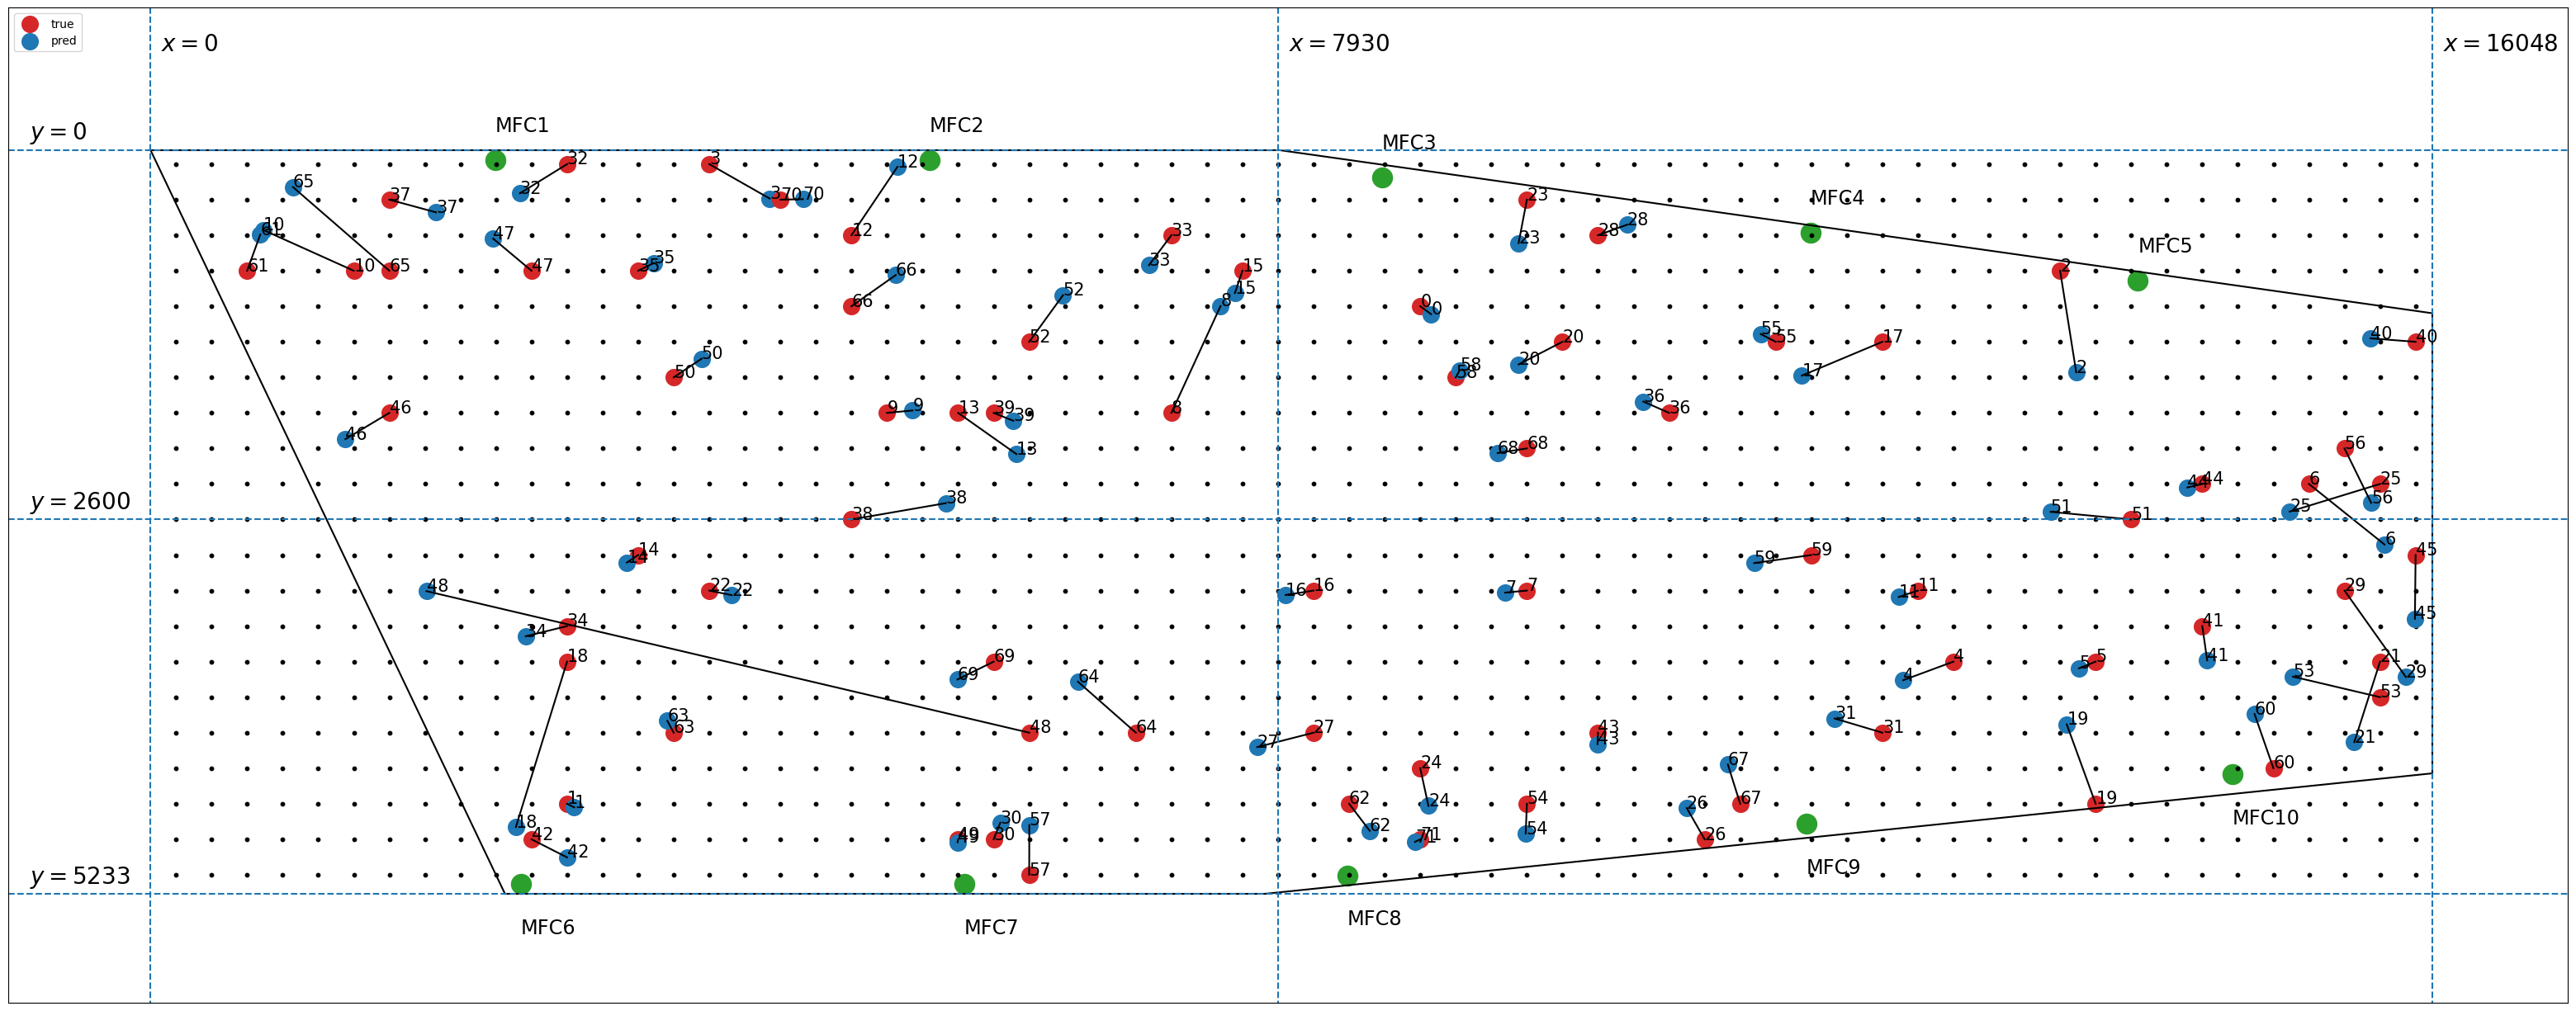

In [8]:
#full data. No idea what special about this model
model6 = tf.keras.models.load_model('saved_model/single_leak/func_hyper_tuning')
X_test, y_test, X_train, y_train, X_val, y_val, scaler_coords = load_data('model_data')
model_evaluate, y_pred = model_eval(model6, X_test, y_test, X_train, y_train, X_val, y_val)
plot_test_pred(y_test, y_pred, scaler_coords)